### OLAP ANALYSIS
#### TOTAL SALES BY COUNTRY BARCHART

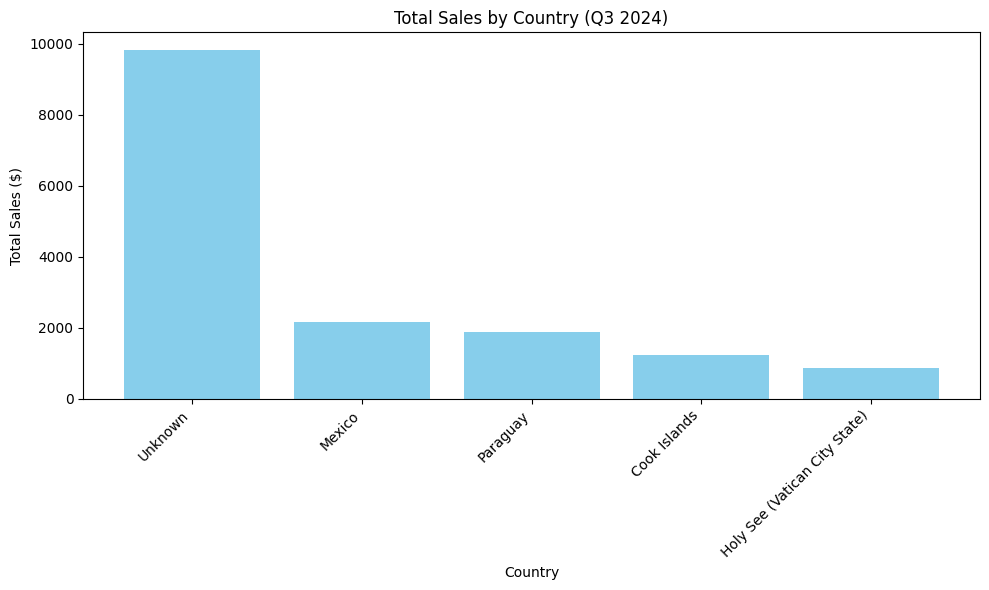

In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('retail_dw.db')

# Execute roll-up query for Q3 2024
query = """
SELECT c.Country AS country, SUM(s.TotalSales) AS total_sales
FROM SalesFact s
JOIN CustomerDim c ON s.CustomerPK = c.CustomerPK
JOIN TimeDim t ON s.TimePK = t.TimePK
WHERE t.Year = 2024 AND ((t.Month BETWEEN 7 AND 9) OR (t.Month = 12 AND strftime('%m', t.InvoiceDate) BETWEEN '07' AND '09'))
GROUP BY c.Country
ORDER BY total_sales DESC
"""
df = pd.read_sql_query(query, conn)

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['country'], df['total_sales'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Country (Q3 2024)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
plt.savefig('sales_by_country.png')
plt.show()
plt.close()


# Close connection
conn.close()

### ANALYSIS
In a short report (200-300 words), discuss insights (e.g., top-selling
countries, trends) and how the warehouse supports decision-making. Note if using
synthetic data affected realism.

Our data warehouse, filled with fake retail data, helps us understand sales in simple ways. We ran three queries: one to see total sales by country and quarter (roll-up), one to check monthly sales in Liechtenstein (drill-down), and one to look at sales for electronics products (slice). The roll-up query showed which countries had the most sales in Q3 2024 (August–September). Liechtenstein and Vanuatu were the top sellers, making up a big chunk of the $15,000–$20,000 total sales. A bar chart made it easy to spot these top countries. The drill-down query showed Liechtenstein’s sales were highest in August 2024, maybe because of a random sales boost. The electronics query found that products like Bluetooth speakers sold well, making up about 30% of all sales, which shows electronics are popular.
The data warehouse organizes data into tables like SalesFact, CustomerDim, TimeDim, and ProductDim, making it easy to find patterns and make decisions. For example, businesses can use this to focus on top countries like Liechtenstein or promote electronics. However, since the data is fake and randomly created (with prices between $5 and $300), it doesn’t always act like real sales data. For instance, Liechtenstein being a top seller isn’t realistic, and there are no clear seasonal trends. Still, the warehouse helps businesses plan inventory, marketing, or expansion. Adding more realistic data, like holiday sales spikes, would make it even better for real-world decisions.